<a href="https://colab.research.google.com/github/irtengunica/yapayzekadosya/blob/master/Hafta3Kod2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
mkdir zoo

In [3]:
ls

sample_data/  zoo/


In [4]:
cd zoo

/content/zoo


In [5]:
pwd

'/content/zoo'

In [36]:
from google.colab import files
uploaded = files.upload()

Saving hayvanatbahcesi1.csv to hayvanatbahcesi1.csv


In [22]:
!rm hay*

In [37]:
ls

hayvanatbahcesi1.csv  hayvanatbahcesi.csv


In [38]:
import numpy as np
import pandas as pd
veri =pd.read_csv("hayvanatbahcesi1.csv",encoding='unicode_escape')

from sklearn import preprocessing
sayisallastirma = preprocessing.LabelEncoder()
veri["hayvan adi"]=sayisallastirma.fit_transform(veri["hayvan adi"])

girisler=np.array(veri.drop(["sinifi"],axis=1))
cikis=np.array(veri["sinifi"])
print(veri)

     hayvan adi  sac varligi  Tuy varligi  yumurta  sut  havada yasami  \
0            93            1            0        0    1              0   
1            14            1            0        0    1              0   
2            18            0            0        1    0              0   
3            16            1            0        0    1              0   
4            25            1            0        0    1              0   
..          ...          ...          ...      ...  ...            ...   
96           86            1            0        0    1              0   
97           91            1            0        1    0              1   
98            4            1            0        0    1              0   
99           75            0            0        1    0              0   
100          96            0            1        1    0              1   

     suda yasami  yiritici  dis varligi  omurga  nefes alimi  zihirli mi  \
0              0         1         

In [39]:
import numpy as np
import pandas as pd
veri =pd.read_csv("hayvanatbahcesi.csv",encoding='unicode_escape')

from sklearn import preprocessing
sayisallastirma = preprocessing.LabelEncoder()
veri["hayvan_adi"]=sayisallastirma.fit_transform(veri["hayvan_adi"])

girisler=np.array(veri.drop(["sinifi"],axis=1))
cikis=np.array(veri["sinifi"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(girisler,cikis, test_size=0.35,random_state=109)

from sklearn.naive_bayes import CategoricalNB

gnb = CategoricalNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)
index = ['1','2','3','4','5','6','7']
columns =  ['1','2','3','4','5','6','7']
cm_df = pd.DataFrame(cm,columns,index)
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,fmt="d")

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


IndexError: index 96 is out of bounds for axis 1 with size 96

Doğruluk: 0.8888888888888888


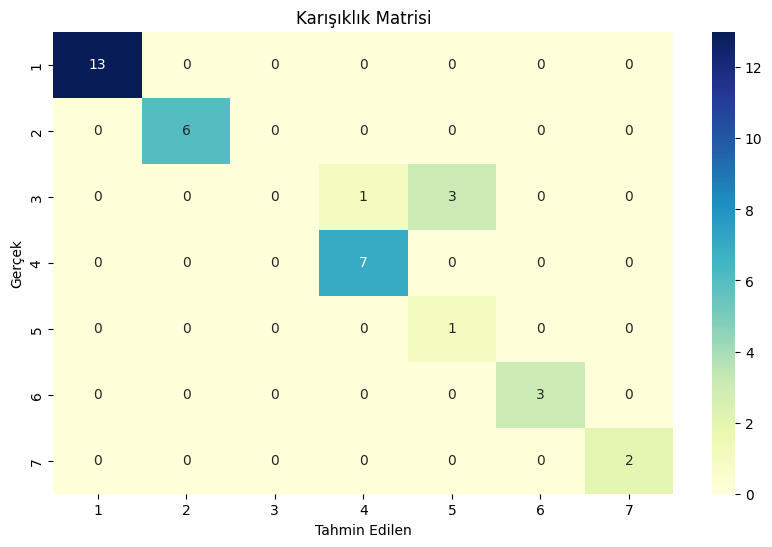

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Verileri yükleyin
veri = pd.read_csv("hayvanatbahcesi.csv", encoding='unicode_escape')

from sklearn import preprocessing
sayisallastirma = preprocessing.LabelEncoder()
veri["hayvan_adi"]=sayisallastirma.fit_transform(veri["hayvan_adi"])

# Özellikler ve hedef değişkeni ayırın
X = veri.drop("sinifi", axis=1)
y = veri["sinifi"]

# Kategorik sınıf adını sayısal değerlere dönüştürün
le = LabelEncoder()
y = le.fit_transform(y)

# Eğitim ve test verilerini ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

# Categorical Naive Bayes modelini oluşturun ve eğitin
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

# Tahmin yapın
y_pred = gnb.predict(X_test)

# Doğruluk ve karışıklık matrisini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirin
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')

# Sonuçları yazdırın
print("Doğruluk:", accuracy)
plt.show()